# 차원축소의 간단한 예시

In [27]:
# 1. 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(columns=['calory','breakfast','lunch','dinner','exercise','body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


- calory와 beakfast와 같은 컬럼들이 바로 우리가 줄여줄 특징 차원
- 마지막 body_shape는 앞의 특징들에 대한 분류 결과인데, 앞의 특징들의 조합에 따라 이 사람의 몸상태를 예측 가능하다.

In [4]:
# X is feature vectors
X = df[['calory','breakfast','lunch','dinner','exercise']]
y = df['body_shape']

In [11]:
# 2. 리스케일링
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [10]:
# 3. 공분산 행렬 구하기
import numpy as np

# features are columns from x_std
features = x_std.T
covariance_matrix = np.cov(features)
covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [16]:
# 4. 공분산 행렬의 고유벡터, 고유값 구하기
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvetors \n%s' %eig_vecs)

Eigenvetors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [17]:
print('Eigenvalues \n%s' %eig_vals)

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [18]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 74% (enough) variances
eig_vals[0] / sum(eig_vals)

0.7318321731427545

In [20]:
# 5. 고유벡터에 데이터 정사영시키기
projected_x = x_std.dot(eig_vecs.T[0])
projected_x

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [22]:
result = pd.DataFrame(projected_x, columns=['PC1'])
result['y-axis']=0.0
result['label'] = y
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


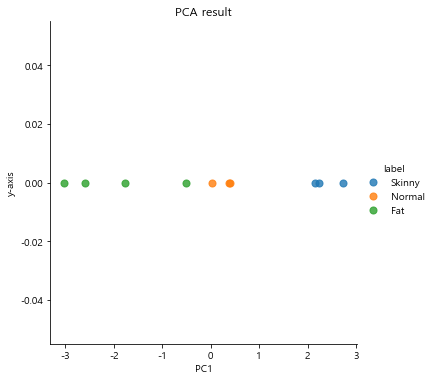

In [32]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result');

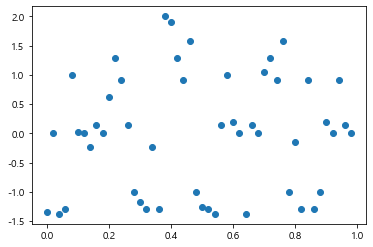

In [54]:
plt.scatter(np.arange(0,1, 0.02),x_std.reshape(-1))

# 차원축소(Dimension Reduction)의 개요
- 차원축소란: 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트로 생성하는 것
- 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 됨
- 많은 피처로 구성된 데이터인 경우 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
- 또한 피처가 많을 경우 개별 피처간에 상관관계가 높을 가능성이 큼 -> 다중 공선성 문제 발생

<br>

- 다차원의 피처를 차원 축소하면 더 직관적으로 데이터를 해석할 수 있다.
- 더불어 학습 데이터의 크기가 줄어들어 Computing Cost를 줄일 수 있다.

<br>

일반적으로 차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)으로 나눌 수 있다.  
- 피처 선택은 특정 피처에 종속성이 강한 불필요한 피처를 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
- 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것
- 이렇게 새롭게 추출된 중요 특성은 기존 피처가 압축된 것이므로 기존 피처와는 완전히 다른 값이 됨
- 피처 추출은 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또다른 공간으로 매핑해 추출하는 것
- 이러한 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것을 의미

**즉, 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA라는 것**
- PCA의 스텝
    1. 입력 데이터 세트의 공분산 행렬을 생성함
    2. 공분한 행렬의 고유벡터와 고유값을 계산함
    3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출함
    4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함

# PCA(Principal Component Analysis)
- PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법
- PCA로 차원을 축소할 때는 기존 데이터의 정보 유실을 최소화해야 함
- PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소함
    - 이것이 PCA의 주성분이 됨(즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주함)
- 데이터 변동성이 가장 큰 방향으로 축을 생성하고, 새롭게 생성된 축으로 데이터를 투영하는 방식
![image](https://user-images.githubusercontent.com/70187490/132119604-56aba7f6-9a58-4b94-bfc6-7f6ab7c77395.png)
- PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교벡터)를 축으로 함
- 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성
- 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소 됨

<br>

**선형대수 관점에서의 PCA**  
- 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것
- 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
- 고유값(eigenvalue)은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타냄
- 선형 변환은 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미함
- 이를 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념으로도 불수 있으며, 이 경우 이 행렬을 바로 공간으로 가정하는 것

<br>

- 고유 벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭함
- 즉, Ax = ax(A는 행렬, x는 고유벡터, a는 스칼라값)
- 이 고유벡터는 여러 개가 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있다.
- 이렇게 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는 데 사용된다.

<br>

- 공분산 행렬은 정방행렬(Diagonal Matrix)이며 대칭행렬(Symmetic Matrix)
- 정방행렬은 열과 행이 같은 행렬을 지칭하는데, 정방행렬 중에서 원소 값이 대칭되는 행렬, 즉 $A^T=A$인 행렬을 대칭 행렬이라고 함
- 공분산 행렬은 개별 분산 값을 대각 원소로 하는 대칭 행렬
- 대칭행렬은 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방 행렬로 대각화할 수 있다.
- 입력 데이터의 공분산 행렬을 C라고 하면 공분산 행렬의 특성으로 인해 다음과 같이 분해할 수 있다.
$$C = P \sum P^T$$
- 이때 $P$는 $n \times n$의 직교행렬이며, $\sum$는 $n \times n$ 정방행렬, $P^T$는 행렬 $P$의 전치 행렬
- 위 식은 고유벡터 행렬과 고유값 행렬로 다음과 같이 대응됨
$$C = \begin{bmatrix} e_1 ... e_n\end{bmatrix}  \begin{bmatrix}\lambda_1 \ ... \ 0 \\ ... \ ... \ ... \\ 0 \ ... \ \lambda_n\end{bmatrix} \begin{bmatrix}e_1^t \\ ... \\ e_n^t \end{bmatrix}$$
- 즉, 공분산 C는 고유벡터 직교행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬로 분해됨
- $e_i$는 $i$번째 고유벡터를, $\lambda_i$는 $i$번째 고유벡터의 크기를 의미.
- $e_1$는 가장 분산이 큰 방향을 가진 고유벡터이며, $e_2$는 $e_1$에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터  

In [55]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


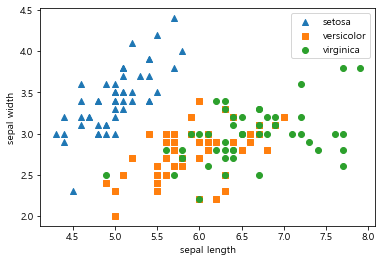

In [56]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
marker = ['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(marker):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width');

- Setosa 품종의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포
- Versicolor와 Virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려운 조건임
> PCA로 4개 속성을 2개로 압축하여 품종 분포를 2차원으로 시각화하는 예제

- 붓꽃 데이터 세트에 바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링 해야 함
- PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음
- 따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요함

In [58]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit( )과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [62]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


> 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화  

pca_component_1 속성을 X축으로, pca_component_2 속성을 Y축으로 하여 품종이 어떻게 분포되는지 확인

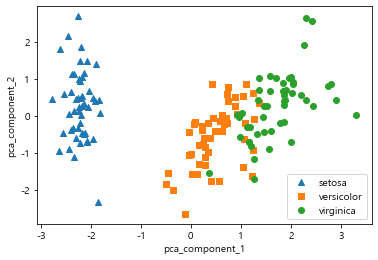

In [63]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^','s','o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot으로 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2');

In [64]:
# PCA변환을 수행한 PCA 객체의 explained_variance_ratio) 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 나타냄
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 첫번째 PCA 변환요소인 pca_component_1이 전체 변동성의 약 72.9%를 차지하며, 두번째 pca_component_2가 22.8%를 차지함
- 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다.
> 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 비교

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [66]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어짐
- 위 붓꽃 데이터의 경우 속성개수가 50% 감소하였지만 예측 성능이 10%가 떨어졌다는 사실은
- PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알수 있다.

> 좀 더 많은 피처를 가진 데이터(신용카드 고객 데이터)를 이용하였을 때의 PCA

In [72]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
df = pd.read_excel(r'D:\python/default of credit card clients.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(4)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [73]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default',axis=1)

feature들 간의 상관도 측정하기

<AxesSubplot:>

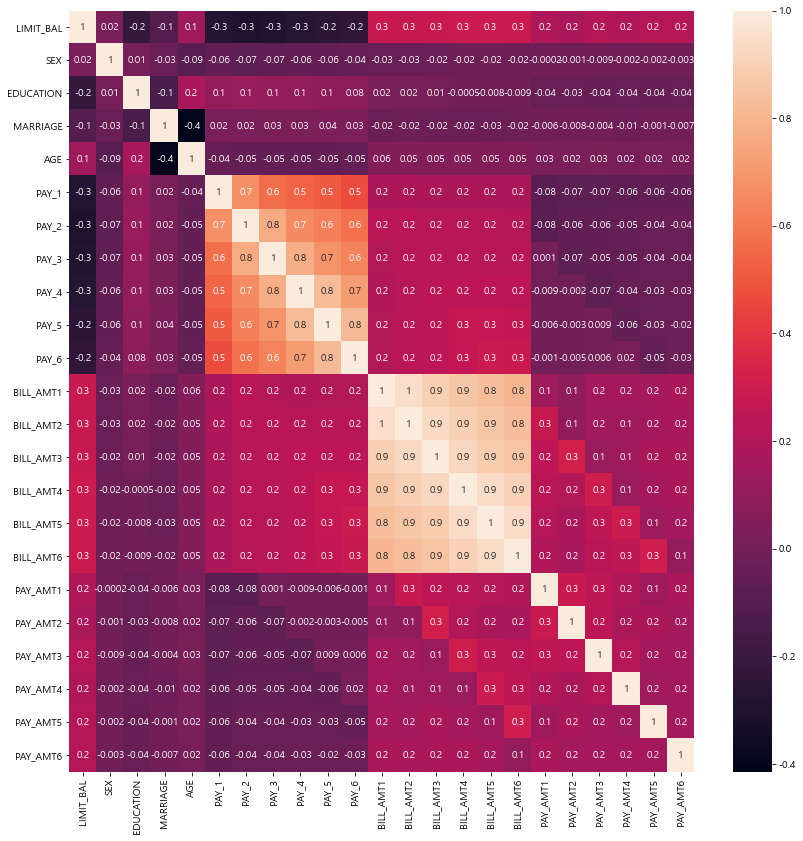

In [74]:
import seaborn as sns

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

- BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음
- PAY_1 ~ PAY_6까지의 속성 역시 상관도가 높음
- BILL_AMT1 ~ BILL_AMT6 6개 속성을 2개의 컴포넌트로 PCA 변환한뒤 개별 컴포넌트의 변동성을 알아보기

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_ATM1 ~ BILL_ATM6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며
- 특히 첫번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높음

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [91]:
# 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하게 분류 예측을 적용

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler( )
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7915 0.7977 0.8015]
PCA 변환 데이터 세트 평균 정확도:0.7969


전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 1~2% 정도의 예측 성능 저하만 발생하였음